## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [3]:
data = pd.read_csv('train.csv')

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [22]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [109]:
pd.options.display.max_columns = 55

In [110]:
data.corr()

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label_binary
url_len,1.000000,-0.025237,0.002045,0.266999,0.307286,0.318562,0.267525,-0.068039,0.254666,NaN,0.051007,0.022133,-0.026747,-0.012090,-0.021466,-0.013244,0.074976,0.043764,-0.037248,-0.019765,NaN,-0.006244
url_num_hyphens_dom,-0.025237,1.000000,0.590701,-0.085595,-0.063760,0.001636,-0.002702,-0.124970,0.071529,NaN,-0.022791,-0.015067,-0.110161,-0.052956,-0.048696,-0.013523,0.039020,-0.043301,0.038859,-0.036764,NaN,0.354757
url_hostname_len,0.002045,0.590701,1.000000,0.077922,-0.094120,0.015964,0.016737,-0.169728,0.163437,NaN,-0.024984,-0.010966,-0.101095,-0.011479,-0.030513,-0.001314,0.002782,0.031408,0.037062,-0.033816,NaN,0.383864
url_num_dots,0.266999,-0.085595,0.077922,1.000000,0.261758,0.227858,0.197085,0.185695,0.195388,NaN,0.031327,-0.000508,-0.086567,-0.030769,-0.017996,-0.027358,-0.024778,-0.000544,-0.066370,-0.027959,NaN,-0.047423
url_num_underscores,0.307286,-0.063760,-0.094120,0.261758,1.000000,0.246138,0.245204,-0.052362,0.244153,NaN,0.091071,-0.027057,-0.069590,-0.029402,-0.021519,-0.017193,0.058710,0.031371,-0.079347,-0.007493,NaN,-0.133613
url_query_len,0.318562,0.001636,0.015964,0.227858,0.246138,1.000000,0.834319,-0.048420,0.358424,NaN,-0.008831,-0.028244,-0.069343,-0.024225,-0.011177,-0.017008,-0.001410,0.150491,-0.001790,-0.023484,NaN,0.189746
url_num_query_para,0.267525,-0.002702,0.016737,0.197085,0.245204,0.834319,1.000000,-0.047094,0.323308,NaN,-0.008589,-0.030607,-0.066105,-0.023562,-0.016472,-0.015195,-0.019295,0.109698,-0.005180,-0.022981,NaN,0.184552
url_ip_present,-0.068039,-0.124970,-0.169728,0.185695,-0.052362,-0.048420,-0.047094,1.000000,-0.165436,NaN,0.099115,-0.028006,-0.086630,-0.032640,0.041168,-0.031364,0.012347,-0.018471,-0.078473,-0.036030,NaN,-0.077163
url_entropy,0.254666,0.071529,0.163437,0.195388,0.244153,0.358424,0.323308,-0.165436,1.000000,NaN,0.056367,-0.014116,-0.100677,0.017249,-0.029899,-0.021477,-0.012620,0.063023,-0.030349,-0.024923,NaN,0.162095
url_chinese_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 결측치 존재 여부 및 조치 방안
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [5]:
def eda_n(data, var, bins = 20): 
    display(data[[var]].describe().T)

    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
url_entropy,3233.0,4.232602,0.394577,2.737839,3.992573,4.195816,4.47006,5.821782


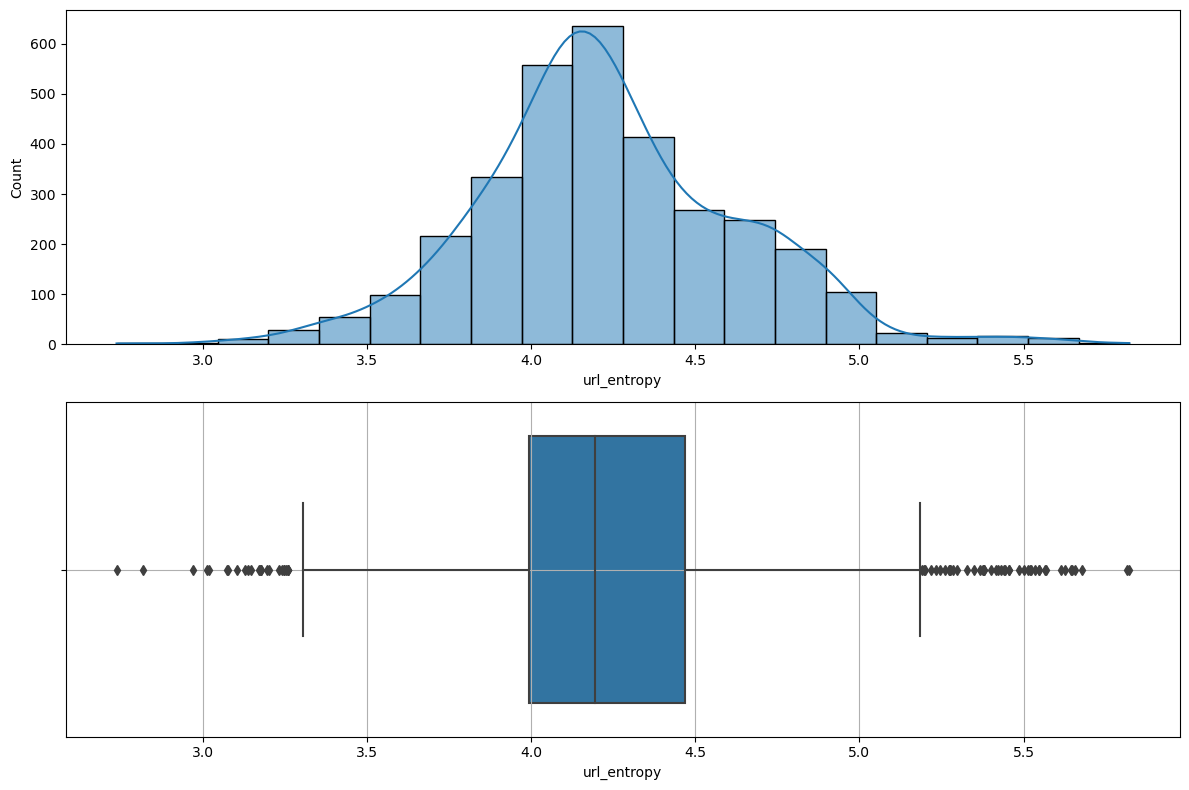

In [126]:
eda_n(data, 'url_entropy')

In [12]:
def eda1_c(data, var):
    print(data[var].value_counts())
    print(data[var].value_counts() / data[var].shape[0])
    sns.countplot(x = data[var])
    plt.grid()
    plt.show()

0.0     2403
1.0      448
2.0      284
3.0       66
4.0       23
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64
0.0     0.743273
1.0     0.138571
2.0     0.087844
3.0     0.020414
4.0     0.007114
5.0     0.001547
6.0     0.000928
14.0    0.000309
Name: url_num_hyphens_dom, dtype: float64


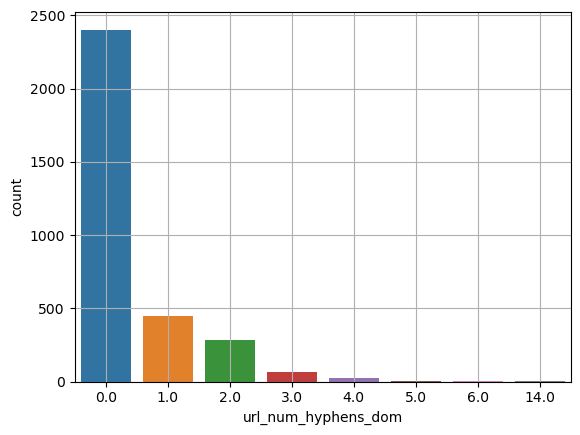

In [162]:
eda1_c(data, 'url_num_hyphens_dom')

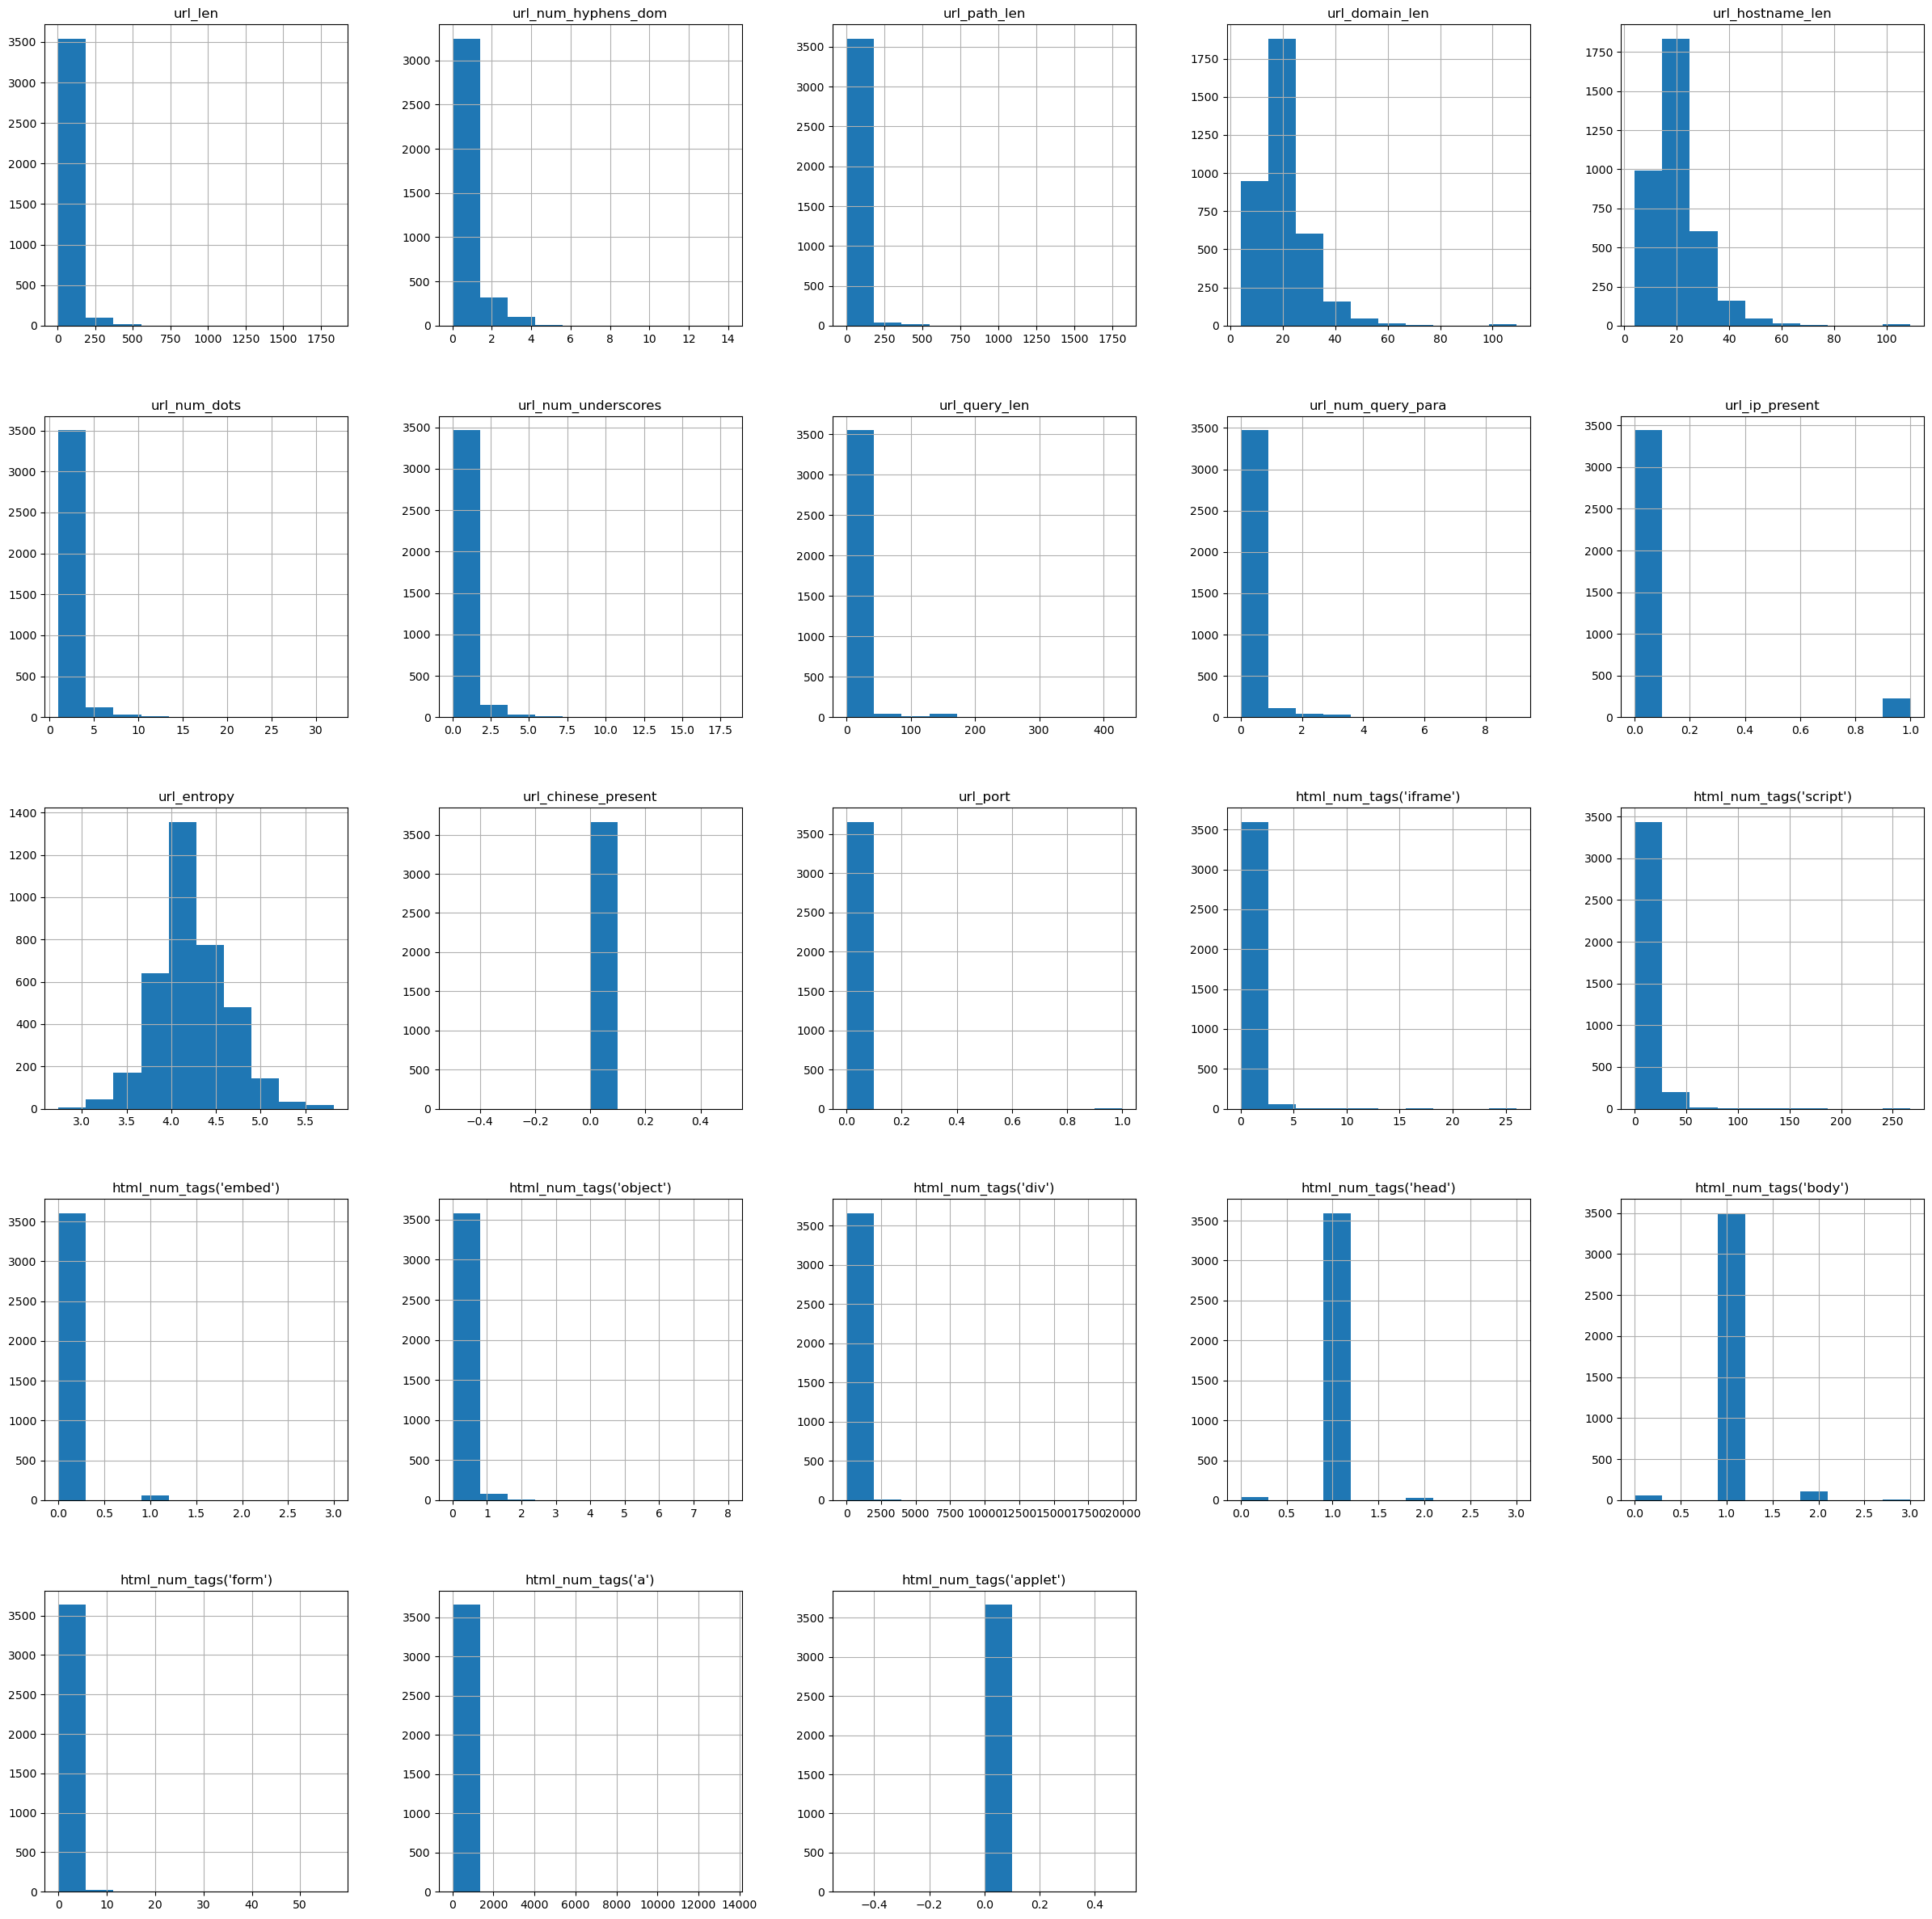

In [7]:
data.hist(bins=10, grid=True, figsize=(30,30))
plt.show()

In [177]:
data.describe()

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label_binary
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.0,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.0,3233.000000
mean,56.106093,0.421590,20.454067,2.521188,0.285184,4.981132,0.110424,0.061243,4.232602,0.0,0.002165,0.216826,8.657284,0.019177,0.030622,69.815032,0.998144,1.016393,0.993814,63.252706,0.0,0.499536
std,86.544916,0.861794,9.904079,1.561923,1.169574,26.280062,0.598983,0.239813,0.394577,0.0,0.046488,0.918223,12.765501,0.150094,0.248740,387.395355,0.142889,0.226720,1.574656,360.524189,0.0,0.500077
min,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,24.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.992573,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,2.000000,0.0,0.000000
50%,36.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.195816,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,32.000000,1.000000,1.000000,1.000000,15.000000,0.0,0.000000
75%,57.000000,1.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.470060,0.0,0.000000,0.000000,12.000000,0.000000,0.000000,60.000000,1.000000,1.000000,1.000000,49.000000,0.0,1.000000
max,1837.000000,14.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,0.0,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0,1.000000


## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [202]:
data.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label_binary
url_len,1.000000,-0.025183,0.944497,0.001670,0.002085,0.267134,0.307256,0.318540,0.267502,-0.067771,0.254685,NaN,0.051000,0.022091,-0.026803,-0.012114,-0.021489,-0.013241,0.074980,0.043752,-0.037282,-0.019775,NaN,-0.006429
url_num_hyphens_dom,-0.025183,1.000000,-0.097643,0.589203,0.590278,-0.085324,-0.063695,0.001715,-0.002627,-0.124600,0.071452,NaN,-0.022785,-0.014977,-0.110263,-0.052932,-0.048672,-0.013765,0.039036,-0.043295,0.038427,-0.036904,NaN,0.355480
url_path_len,0.944497,-0.097643,1.000000,-0.123280,-0.123081,0.196425,0.254179,0.011303,0.010422,-0.037249,0.131595,NaN,0.056566,0.033574,0.006749,-0.003340,-0.015291,-0.008044,0.078578,-0.006032,-0.042510,-0.008870,NaN,-0.113835
url_domain_len,0.001670,0.589203,-0.123280,1.000000,0.998956,0.082025,-0.092685,0.014915,0.015721,-0.150800,0.160224,NaN,-0.002415,-0.011562,-0.103895,-0.012265,-0.029448,-0.002495,0.002868,0.031097,0.033835,-0.035063,NaN,0.380448
url_hostname_len,0.002085,0.590278,-0.123081,0.998956,1.000000,0.078337,-0.094091,0.016032,0.016803,-0.169295,0.163410,NaN,-0.024982,-0.010897,-0.101211,-0.011445,-0.030490,-0.001540,0.002779,0.031446,0.036627,-0.033953,NaN,0.384489
url_num_dots,0.267134,-0.085324,0.196425,0.082025,0.078337,1.000000,0.261850,0.227932,0.197153,0.184992,0.195450,NaN,0.031340,-0.000463,-0.086458,-0.030750,-0.017976,-0.027272,-0.024784,-0.000531,-0.066137,-0.027895,NaN,-0.047256
url_num_underscores,0.307256,-0.063695,0.254179,-0.092685,-0.094091,0.261850,1.000000,0.246116,0.245183,-0.052211,0.244172,NaN,0.091066,-0.027094,-0.069631,-0.029422,-0.021538,-0.017179,0.058713,0.031360,-0.079358,-0.007495,NaN,-0.133808
url_query_len,0.318540,0.001715,0.011303,0.014915,0.016032,0.227932,0.246116,1.000000,0.834315,-0.048321,0.358440,NaN,-0.008836,-0.028272,-0.069375,-0.024240,-0.011191,-0.016998,-0.001409,0.150485,-0.001790,-0.023486,NaN,0.189689
url_num_query_para,0.267502,-0.002627,0.010422,0.015721,0.016803,0.197153,0.245183,0.834315,1.000000,-0.046998,0.323323,NaN,-0.008594,-0.030635,-0.066136,-0.023577,-0.016486,-0.015185,-0.019294,0.109691,-0.005181,-0.022982,NaN,0.184497
url_ip_present,-0.067771,-0.124600,-0.037249,-0.150800,-0.169295,0.184992,-0.052211,-0.048321,-0.046998,1.000000,-0.165779,NaN,0.099405,-0.027805,-0.086306,-0.032573,0.041407,-0.031192,0.012362,-0.018434,-0.077854,-0.035891,NaN,-0.076236


In [14]:
plt.figure(figsize=(20,17))
sns.heatmap(data.corr(),
           annot=True,
           cmap = 'Blues',
           cbar = False,
           square=True,
           fmt = '.2f',
           annot_kws={'size' : 8}) 
plt.show()

SyntaxError: invalid non-printable character U+00A0 (2610075232.py, line 3)

TypeError: Could not convert maliciousbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousbenignbenignbenignmaliciousbenignbenignmaliciousmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignbenignbenignbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignbenignbenignbenignbenignmaliciousbenignbenignbenignmaliciousmaliciousbenignbenignmaliciousmaliciousmaliciousbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousbenignbenignmaliciousbenignbenignbenignbenignbenignbenignbenignmaliciousmaliciousmaliciousmaliciousbenignbenignbenignmaliciousbenignmaliciousmaliciousbenignmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignmaliciousbenignbenignbenignbenignbenignmaliciousmaliciousbenignmaliciousbenignbenignbenignbenignmaliciousbenignbenignbenignbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousmaliciousbenignmaliciousmaliciousbenignbenignmaliciousbenignmaliciousbenignbenignmaliciousbenignbenign to numeric

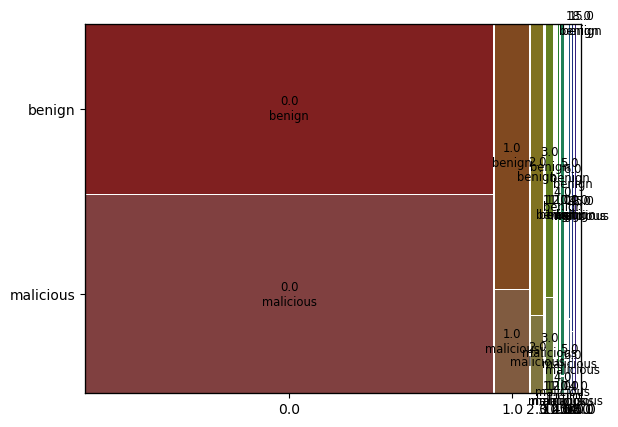

In [134]:
# 범주 -> 범주
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [137]:
target = 'label'

In [136]:
def chi(feature):# 먼저 집계
    table = pd.crosstab(data[target], data[feature])
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('기대빈도\n',result[3])

In [158]:
chi('url_len')

교차표
 url_len    6.0     7.0     9.0     10.0    11.0    12.0    13.0    14.0    \
label                                                                       
benign          1       1       5       5      11      14      29      44   
malicious       0       0       0       0       1       3      10      15   

url_len    15.0    16.0    17.0    18.0    19.0    20.0    21.0    22.0    \
label                                                                       
benign         41      42     101      63      29      43      35      34   
malicious      10      15      13      20      20      15      27      27   

url_len    23.0    24.0    25.0    26.0    27.0    28.0    29.0    30.0    \
label                                                                       
benign         39      49      26      41      30      30      24      27   
malicious      35      27      33      31      30      29      25      44   

url_len    31.0    32.0    33.0    ...  353.0   362.0   368.0   386.

In [23]:
# 숫자 -> 범주
def eda2_nc(data, target, var):
    plt.figure(figsize = (8, 10))
    plt.subplot(2, 1, 1)
    sns.kdeplot(x = var, data = data, hue = target, common_norm = False)
    plt.grid()
    
    plt.subplot(2, 1, 2)

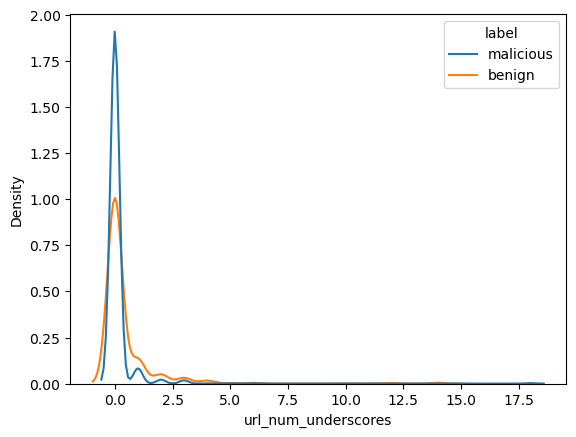

In [161]:
sns.kdeplot(x= 'url_num_underscores', data = data, hue = 'label', 
            common_norm = False)
plt.show()

In [166]:
# 범주 -> 숫자
def n(var, data):
    sns.barplot(x=var, y='label', data = data)
    plt.grid()
    plt.show()

In [172]:
var = 'url_entropy'

d_b = data.loc[data[var]=='1', target]
d_m = data.loc[data[var]=='0', target]

spst.ttest_ind(d_b, d_m)

Ttest_indResult(statistic=nan, pvalue=nan)

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [34]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [196]:
# 중복 데이터 제거를 제거합니다.
data = data.drop_duplicates()

In [197]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [85]:
data['label'].unique()

array(['malicious', 'benign'], dtype=object)

### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [9]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.
data.loc[:, ['label_binary']] = data['label'].copy

In [187]:
data['label'].unique()

array(['malicious', 'benign'], dtype=object)

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [10]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
data['label_binary'] = data['label'].replace('benign',0).replace('malicious',1)

In [193]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
data['label'].unique()

array(['malicious', 'benign'], dtype=object)

In [194]:
data['label_binary'].unique()

array([1, 0], dtype=int64)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [198]:
# 결축치의 존재를 확인합니다.
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [105]:
data['url_domain_len'].value_counts(dropna=True)

17.0     397
14.0     226
13.0     221
15.0     191
16.0     182
        ... 
109.0      1
55.0       1
72.0       1
68.0       1
103.0      1
Name: url_domain_len, Length: 67, dtype: int64

In [199]:
# 결측치를 적절히 처리해줍니다.
data = data.dropna(axis=0)

In [200]:
# 결축치의 존재를 확인합니다.
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_port                 3231 non-null   float64
 12  html_num_tags('iframe')  3231 non-null   float64
 13  html_num_tags('script')  3231 non-null   float64
 14  html_num_tags('embed')  

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [219]:
data.drop(columns=['url_chinese_present', "html_num_tags('applet')", 'label'], inplace=True)

KeyError: '[\'url_chinese_present\', "html_num_tags(\'applet\')"] not found in axis'

In [220]:
data.drop(columns=[ 'label'], inplace=True)

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [2]:
 from sklearn.model_selection import train_test_split
# x = data.iloc[:, 0:len(data.columns)-1].values
# y = data.iloc[:, len(data.columns)-1].values

In [3]:
# x, y 분리
target = 'label_binary' 
x = data.drop(target, axis=1)
y = data.loc[:, target]

NameError: name 'data' is not defined

In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=2023)

NameError: name 'x' is not defined

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

In [224]:
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)
train_y = pd.DataFrame(train_y)
test_y = pd.DataFrame(test_y)
train_x.to_csv("train_x.csv", index = False)
train_y.to_csv("train_y.csv", index = False)
test_x.to_csv("test_x.csv", index = False)
test_y.to_csv("test_y.csv", index = False)